## Canada Open Data Status 

#### Open Data Canada - Government of Canada organizations to conduct an inventory of their open data holdings. All of the inventories we received have been consolidated into the chart below. Use the thumbs up to help prioritize the release of a dataset.
#### Total count of inventory

In [7]:
import duckdb

con = duckdb.connect('db/cdn_open_data.db')

total = con.query("""SELECT count(*) from inventory;""")
print(total)

con.close()

┌──────────────┐
│ count_star() │
│    int64     │
├──────────────┤
│        11161 │
└──────────────┘



#### Released vs No Yet Released

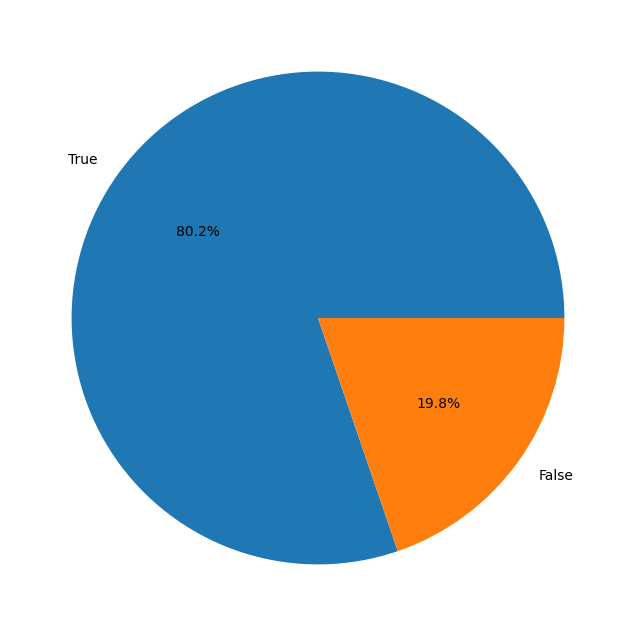

In [1]:
import duckdb
import polars as pl
import matplotlib.pyplot as plt

con = duckdb.connect('db/cdn_open_data.db')

duckdb_to_arrow = con.query("""
    SELECT 
        count(*) - count(date_released) as 'count', 
        CAST(false AS boolean) as released 
    FROM inventory 
    UNION 
    SELECT 
        count(date_released), 
        CAST(true AS boolean) as released 
    FROM inventory;
""").arrow()
polars_df = pl.DataFrame(duckdb_to_arrow)

# display(polars_df)

# polars_df
plt.figure(figsize=(8,8))

# plot a Pie Chart for Registration Price column with label Car column
plt.pie(polars_df["count"], labels = polars_df["released"], autopct='%1.1f%%')
plt.show()

con.close()

### Released by Divison - TOP 10

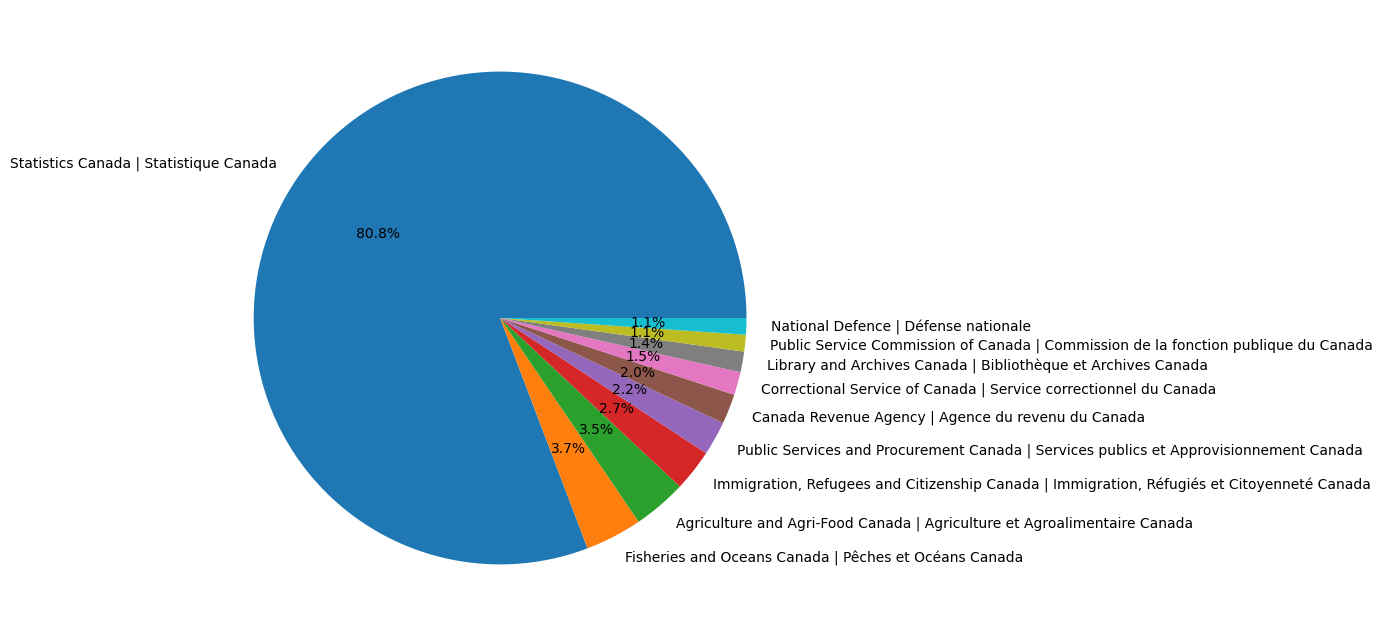

In [6]:
import duckdb
import polars as pl
import matplotlib.pyplot as plt
# import ipywidgets as widgets

con = duckdb.connect('db/cdn_open_data.db')

duckdb_to_arrow = con.query(
"""
    select 
        owner_org_title, 
        count(date_released) as released 
    from inventory 
    group by 
        owner_org_title 
    order by 
        released 
    desc 
    limit 10;
""").arrow()
polars_df = pl.DataFrame(duckdb_to_arrow)

# display(polars_df)

# polars_df
plt.figure(figsize=(8,8))

# plot a Pie Chart for Registration Price column with label Car column
plt.pie(polars_df["released"], labels = polars_df["owner_org_title"], autopct='%1.1f%%')
plt.show()

# def say_my_name(name):
#     """
#     Print the current widget value in short sentence
#     """
#     print(f'My name is {name}')
     
# widgets.interact(say_my_name, name=polars_df["owner_org_title"]);

con.close()

### division with released counts

In [5]:
import plotly.express as px
import duckdb
import polars as pl

con = duckdb.connect('db/cdn_open_data.db')

duckdb_to_arrow = con.query(
"""
    select 
        owner_org_title, 
        count(date_released) as released 
    from inventory 
    group by 
        owner_org_title 
    order by 
        released 
    desc 
    limit 10;
""").arrow()
polars_df = pl.DataFrame(duckdb_to_arrow)

fig = px.bar(x=polars_df['owner_org_title'], y=polars_df['released'])
fig.show()

con.close()

### what's release and published date range

In [4]:
import duckdb
import polars as pl
import plotly.graph_objects as go

con = duckdb.connect('db/cdn_open_data.db', read_only=False)

duckdb_to_arrow = con.query(
"""
    select max(TRY_CAST(date_released as date)) as latest_released, min(TRY_CAST(date_released as date)) as earliest_released from inventory;
""").arrow()

polars_df = pl.DataFrame(duckdb_to_arrow)

fig = go.Figure(data=[go.Table(header=dict(values=['latest_released', 'earliest_released']),
                 cells=dict(values=[polars_df['latest_released'], polars_df['earliest_released']]))])
fig.show()

duckdb_to_arrow = con.query(
"""
    select max(TRY_CAST(date_published as date)) as latest_published, min(TRY_CAST(date_published as date)) as earliest_published from inventory;
""").arrow()

polars_df = pl.DataFrame(duckdb_to_arrow)

fig = go.Figure(data=[go.Table(header=dict(values=['latest_published', 'earliest_published']),
                 cells=dict(values=[polars_df['latest_published'], polars_df['earliest_published']]))])
fig.show()

con.close()

### Top 10 most user voted. (publish, but not released)

In [2]:
import plotly.graph_objects as go
import polars as pl
import duckdb

con = duckdb.connect('db/cdn_open_data.db')

duckdb_to_arrow = con.query(
"""
select title_en, owner_org_title, user_votes, date_published, date_released from inventory where date_published is not null and date_released is null order by user_votes desc limit 10;
""").arrow()

polars_df = pl.DataFrame(duckdb_to_arrow)

fig = go.Figure(data=[go.Table(header=dict(values=['title_en', 'owner_org_title', 'user_votes', 'date_published', 'date_released']),
                 cells=dict(values=[polars_df['title_en'], polars_df['owner_org_title'], polars_df['user_votes'], polars_df['date_published'], polars_df['date_released']]))])
fig.show()
con.close()

### Top 10 most user voted. (publish, and released)

In [3]:
import plotly.graph_objects as go
import polars as pl
import duckdb

con = duckdb.connect('db/cdn_open_data.db')

duckdb_to_arrow = con.query(
"""
select title_en, owner_org_title, user_votes, date_published, date_released from inventory where date_published is not null and date_released is not null order by user_votes desc limit 10;
""").arrow()

polars_df = pl.DataFrame(duckdb_to_arrow)

fig = go.Figure(data=[go.Table(header=dict(values=['title_en', 'owner_org_title', 'user_votes', 'date_published', 'date_released']),
                 cells=dict(values=[polars_df['title_en'], polars_df['owner_org_title'], polars_df['user_votes'], polars_df['date_published'], polars_df['date_released']]))])
fig.show()
con.close()